In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from fractions import Fraction
from model_scoring import ModelScorer

%matplotlib inline 

In [2]:
results_df = pd.read_csv("model_responses_with_time_tqdm2S.csv")

results_df.head()

,question,model_answer,expected_answer,category,response_time,Human_EvaluatorScore,Max_Score
0,Which of the following foods takes the least e...,Question:\nWhich of the following foods takes ...,['Fresh vegetables'],Food and Sustainability,35.182707,1,1
1,Which of the following are carbon sources? Sel...,Question:\nWhich of the following are carbon s...,"['Fossil fuel combustion', 'Volcanic eruptions']",Carbon Sources,30.788820,2,2
2,Which of the following are carbon sinks? Selec...,Question:\nWhich of the following are carbon s...,"['Soil and rocks', 'Forests', 'Oceans']",Carbon Sinks,31.751782,0,3
3,Forests are carbon sinks because they remove c...,Question:\nForests are carbon sinks because th...,Photosynthesis,Carbon Cycle,41.005182,0,1
4,Human activities add greenhouse gases to the a...,Question:\nHuman activities add greenhouse gas...,Sources,Human Impact,34.545158,1,1


In [3]:
results_df['Human_EvaluatorScore'] = results_df['Human_EvaluatorScore'].apply(
    lambda x: float(Fraction(x)) if isinstance(x, str) and '/' in x else pd.to_numeric(x)
)
results_df['Max_Score'] = pd.to_numeric(results_df['Max_Score'])

In [4]:
results_df.Human_EvaluatorScore.unique()

array([1.        , 2.        , 0.        , 3.        , 0.33333333,
       0.25      , 0.5       , 4.        , 0.75      ])

In [5]:
results_df.Human_EvaluatorScore.value_counts()

Human_EvaluatorScore
1.000000    31
0.000000    20
2.000000     7
0.250000     5
0.333333     3
3.000000     2
0.500000     1
4.000000     1
0.750000     1
Name: count, dtype: int64

In [6]:
np.sum(results_df.Max_Score), np.sum(results_df.Human_EvaluatorScore)

(99, 58.5)

In [7]:
results_df['Max_Score'].value_counts()

Max_Score
1    56
2     8
4     6
3     1
Name: count, dtype: int64

In [8]:
results_df['category'].value_counts()

category
Fossil Fuels                      5
Greenhouse Gases                  4
Carbon Cycle                      3
Climate Change                    3
Nonrenewable Resources            2
Renewable Energy                  2
Human Impact                      2
Carbon Footprint                  2
Carbon Footprint Reduction        2
Carbon Sources                    2
Climate Change Rate               1
Historical CO2 Levels             1
Natural Climate Change            1
Food and Sustainability           1
Global Temperature Change         1
Carbon Dioxide Increase           1
Paleoclimatology                  1
Greenhouse Effect                 1
Waste Management                  1
Greenhouse Gas Sources            1
Misconceptions                    1
Scientific Consensus              1
Carbon Management                 1
Cumulative Emissions              1
CO2 Lifetime                      1
Future Climate Scenarios          1
Ocean Acidification               1
Coral Bleaching    

In [9]:
results_df.dtypes

question                 object
model_answer             object
expected_answer          object
category                 object
response_time           float64
Human_EvaluatorScore    float64
Max_Score                 int64
dtype: object

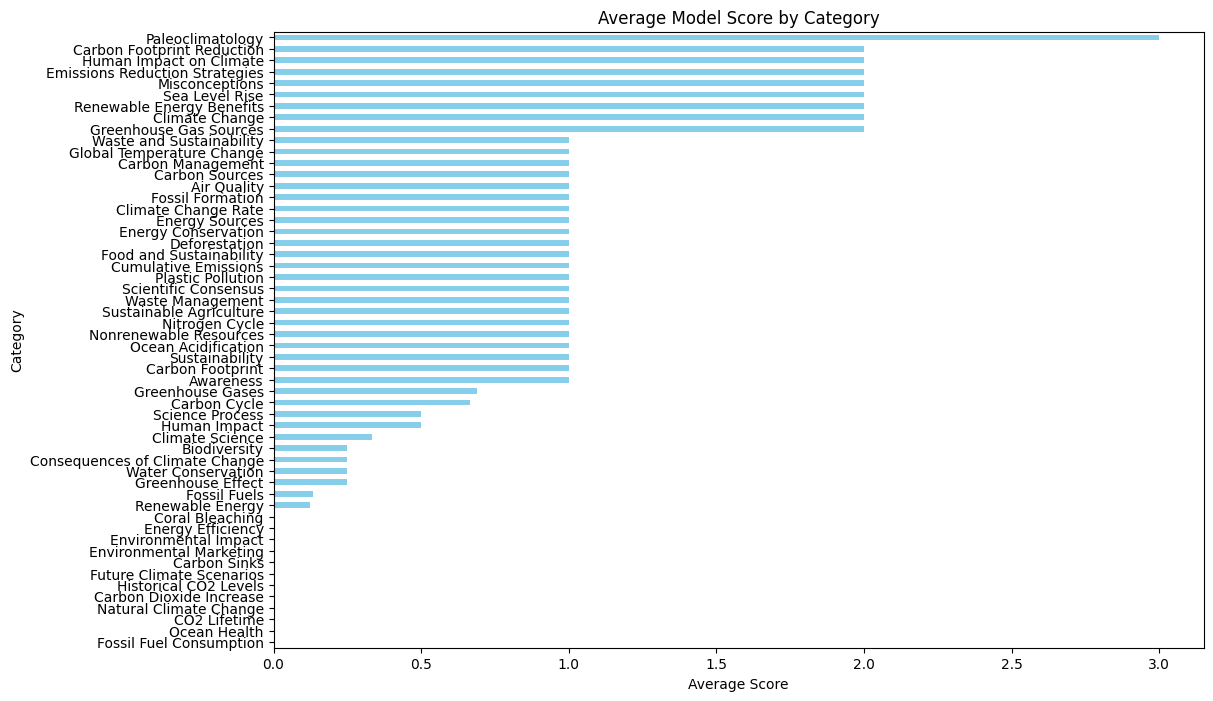

In [10]:
# Group by category and plot average score per category
category_performance = results_df.groupby('category')['Human_EvaluatorScore'].mean().sort_values()

plt.figure(figsize=(12, 8))
category_performance.plot(kind='barh', color='skyblue')
plt.title('Average Model Score by Category')
plt.xlabel('Average Score')
plt.ylabel('Category')
plt.show()

Alright `PaleClimatology` has the largest score this isn't Iformative Enough since The differnt questions had differnt score based On:
1) Number of chooces that were correct
2) Was the answere clear Enough ?
<p><b>Let's Drill Deeper</b></p>

**Some categories only had one Qustion relted to it let's put them off for a while**

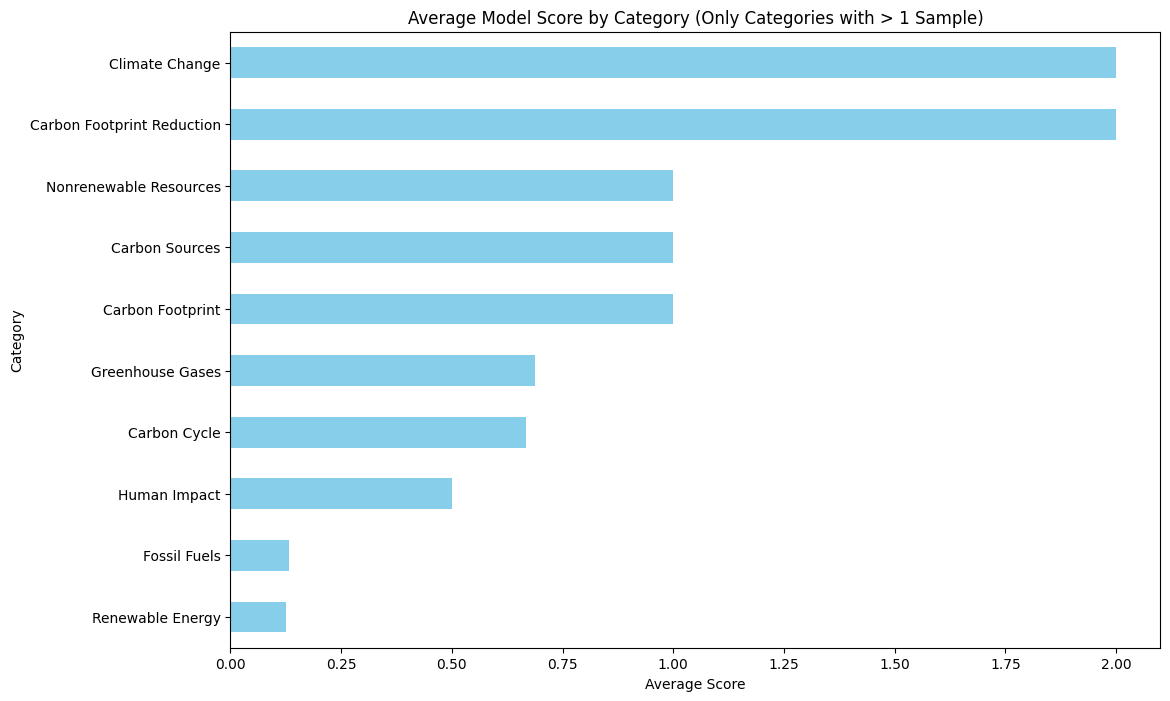

In [11]:
# Filter categories with more than 1 question
min_samples = 2
category_performance = results_df.groupby('category').filter(lambda x: len(x) >= min_samples)

# Now, compute the average score per category
category_performance_avg = category_performance.groupby('category')['Human_EvaluatorScore'].mean().sort_values()

# Plot the average score per category for those with sufficient samples
plt.figure(figsize=(12, 8))
category_performance_avg.plot(kind='barh', color='skyblue')
plt.title('Average Model Score by Category (Only Categories with > 1 Sample)')
plt.xlabel('Average Score')
plt.ylabel('Category')
plt.show()

Alright Seems like our model had a greater score for `Climate change`, followed by `Carbon Footprint Reduction` then a tie between `Non-Renewable Resources`, `Carbon sources`, `Carbon Footprint` Intresting

<Figure size 1200x800 with 0 Axes>

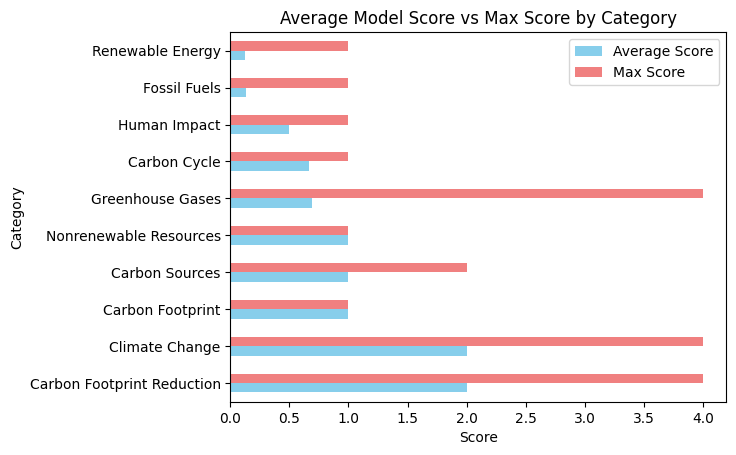

In [12]:
# Filter categories with more than 1 question
min_samples = 2
category_performance = results_df.groupby('category').filter(lambda x: len(x) >= min_samples)

# Calculate the average score per category
category_performance_avg = category_performance.groupby('category')['Human_EvaluatorScore'].mean()

# Calculate the max score per category
category_max_score = category_performance.groupby('category')['Max_Score'].max()

# Combine the two into a DataFrame for comparison
category_comparison = pd.DataFrame({
    'Average Score': category_performance_avg,
    'Max Score': category_max_score
}).sort_values(by='Average Score', ascending=False)

# Plot the average and max scores for each category
plt.figure(figsize=(12, 8))
category_comparison.plot(kind='barh', color=['skyblue', 'lightcoral'])
plt.title('Average Model Score vs Max Score by Category')
plt.xlabel('Score')
plt.ylabel('Category')
plt.show()

Interseting Incomarison to the maximum possible score `Carbon Footprint Reduction` and `Climate change` are still leading but with a huge distinction between Model sore and MAX posible score  Followed `Carbon Footprint`, `carbon Scources` and `Nonrenewable Resources`, to note `Carbon Footprint` and  `Nonrenewable Resources` have the maximum models score for their categories also `Greenhouse Gases` have the largest gap between model score and MAXIMUM possible score
 
<p>What Does this Mean we need to <b>Dive in deeper</b> to our results</p>

<Figure size 1200x800 with 0 Axes>

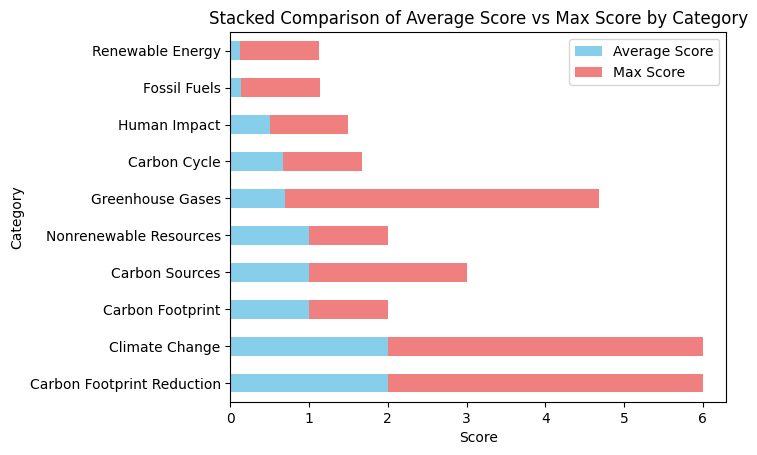

In [13]:
# Plot stacked bar of Average Score and Max Score for comparison
plt.figure(figsize=(12, 8))
category_comparison[['Average Score', 'Max Score']].plot(kind='barh', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Stacked Comparison of Average Score vs Max Score by Category')
plt.xlabel('Score')
plt.ylabel('Category')
plt.show()

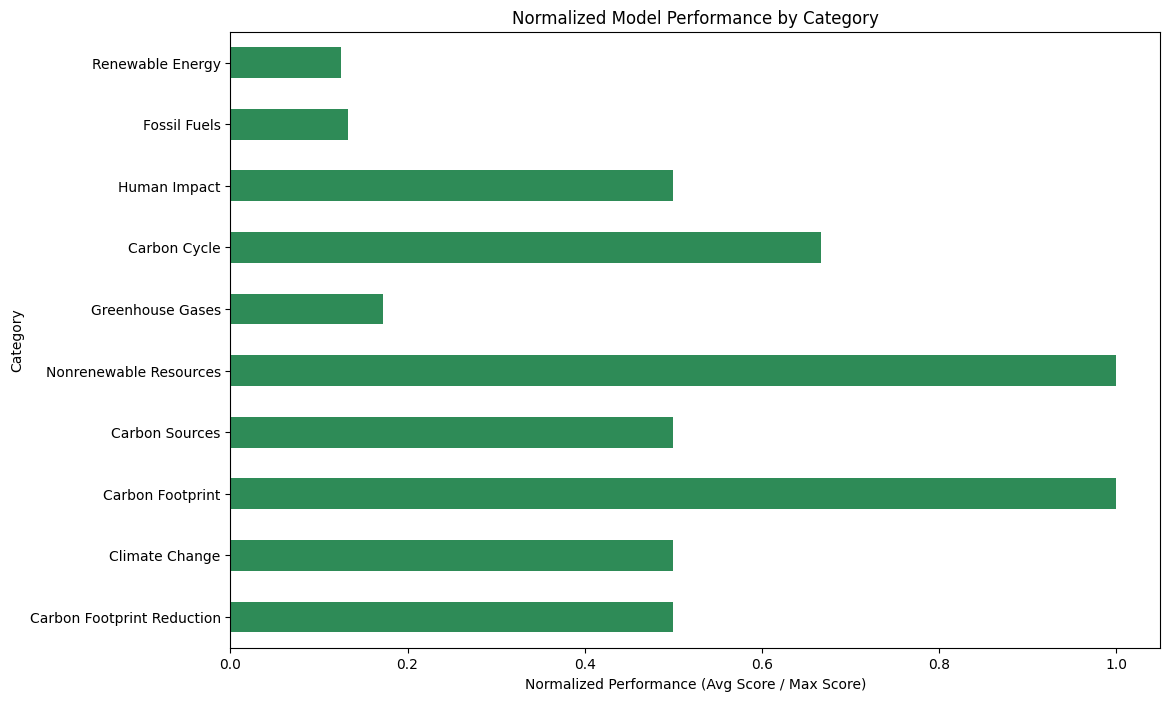

In [14]:
# Calculate normalized performance (average score / max score)
category_comparison['Normalized Performance'] = category_comparison['Average Score'] / category_comparison['Max Score']

# Plot the normalized performance for each category
plt.figure(figsize=(12, 8))
category_comparison['Normalized Performance'].plot(kind='barh', color='seagreen')
plt.title('Normalized Model Performance by Category')
plt.xlabel('Normalized Performance (Avg Score / Max Score)')
plt.ylabel('Category')
plt.show()

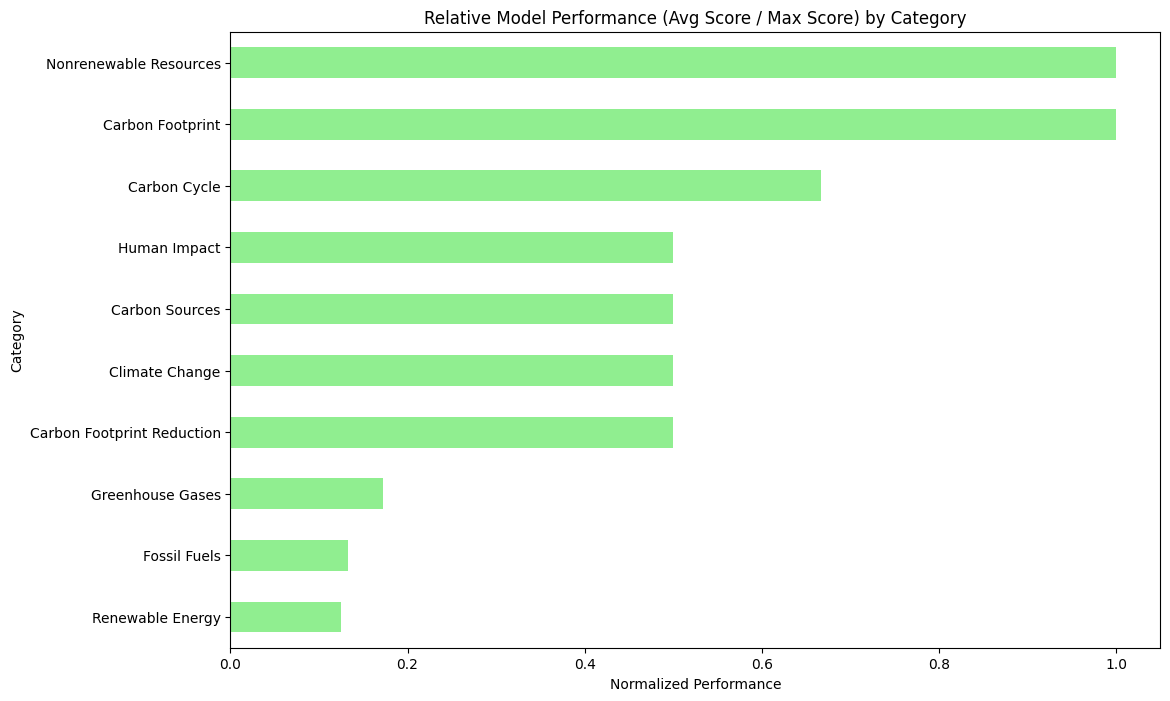

In [15]:
plt.figure(figsize=(12, 8))
category_comparison['Normalized Performance'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Relative Model Performance (Avg Score / Max Score) by Category')
plt.xlabel('Normalized Performance')
plt.ylabel('Category')
plt.show()

On the Normalized Point of view best Qusetions Categories that our model Did best are :
1) `Non-Renewable Rseources`
2) `Carbon Foot Print`
3) `Carbon cycle`

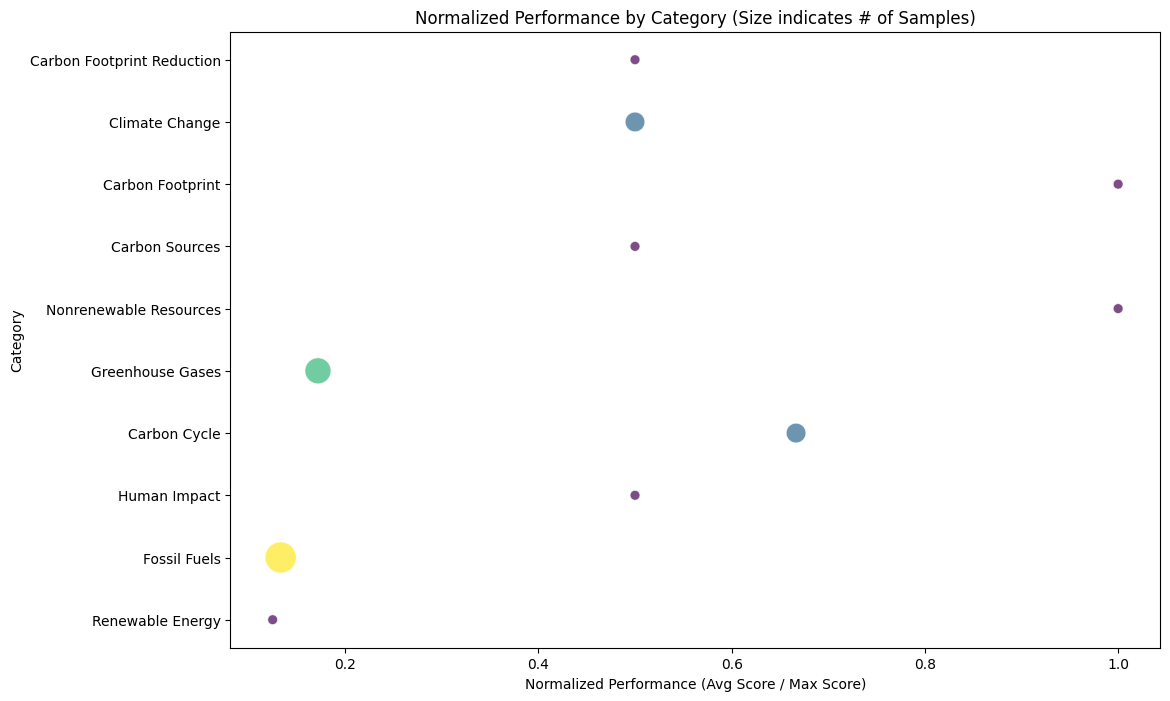

In [16]:
# Normalize performance
category_comparison['Normalized Performance'] = category_comparison['Average Score'] / category_comparison['Max Score']

# Add the number of samples per category as a size indicator
category_comparison['Category Size'] = category_performance.groupby('category').size()

# Plot Normalized Performance with size/color based on Category Size
plt.figure(figsize=(12, 8))
sb.scatterplot(data=category_comparison, x='Normalized Performance', y=category_comparison.index, size='Category Size', hue='Category Size', palette='viridis', sizes=(50, 500), legend=None, alpha=0.7)
plt.title('Normalized Performance by Category (Size indicates # of Samples)')
plt.xlabel('Normalized Performance (Avg Score / Max Score)')
plt.ylabel('Category')
plt.show()

Categories with Borad/vast number of questions seems to be doing badly on our model this would need match more time to Investigate and DRILL more into as a later research but other vast topic seem to doing great
<p>This is Evident from the Following Categories</p>

1) `Fossil Fuels`
2) `Greenhouse Gases`

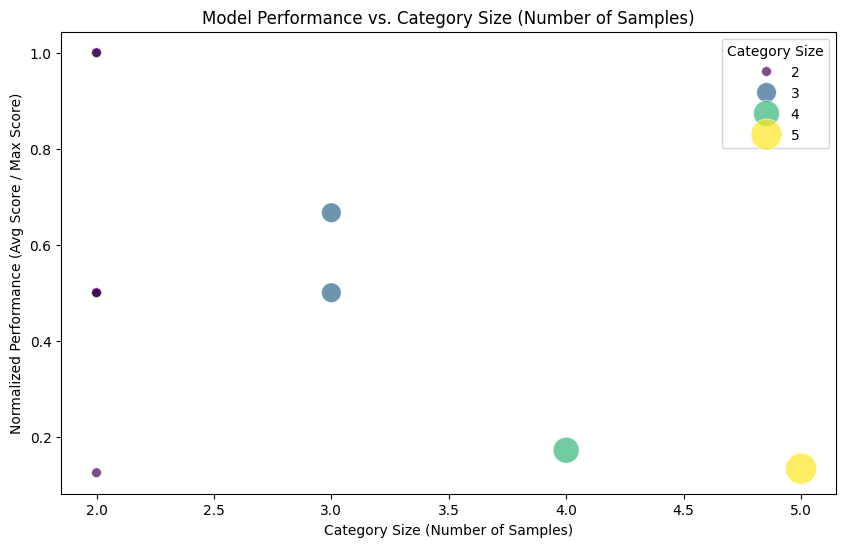

In [17]:
# Calculate the number of samples per category
category_counts = results_df['category'].value_counts()

# Plot Performance vs. Category Size
plt.figure(figsize=(10, 6))
sb.scatterplot(data=category_comparison, x='Category Size', y='Normalized Performance', hue='Category Size', palette='viridis', size='Category Size', sizes=(50, 500), alpha=0.7)
plt.title('Model Performance vs. Category Size (Number of Samples)')
plt.xlabel('Category Size (Number of Samples)')
plt.ylabel('Normalized Performance (Avg Score / Max Score)')
plt.show()

/tmp/ipykernel_342027/4136312586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(data=results_df[results_df['category'].isin(category_comparison.index)], x='category', y='Human_EvaluatorScore', palette='Set2', inner="stick")


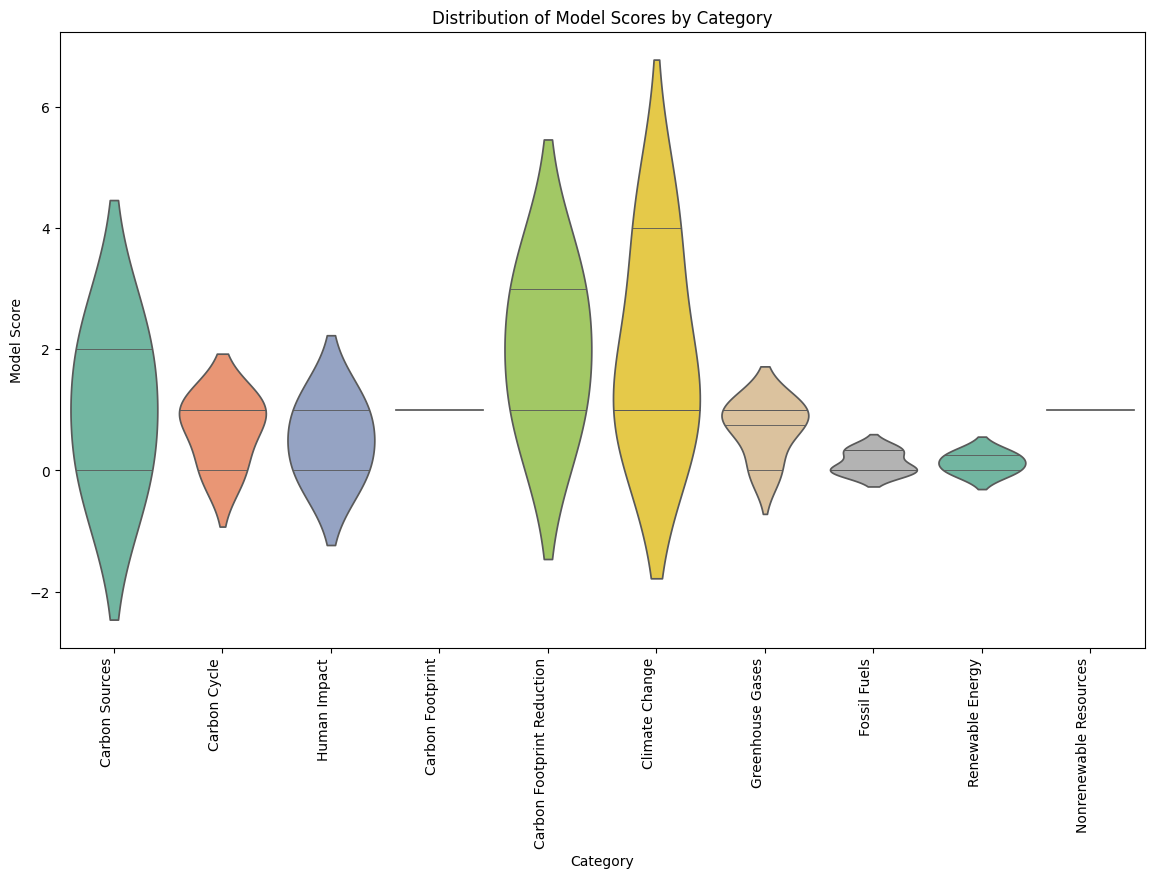

In [18]:
plt.figure(figsize=(14, 8))
sb.violinplot(data=results_df[results_df['category'].isin(category_comparison.index)], x='category', y='Human_EvaluatorScore', palette='Set2', inner="stick")
plt.title('Distribution of Model Scores by Category')
plt.xlabel('Category')
plt.ylabel('Model Score')
plt.xticks(rotation=90, ha='right')
plt.show()

Alrigt We our Human Model Scores Distributions seems to be quite Intesting But as of now for a later topic
<P>#<B>Did it MYSELF</B></P>

## USING Script to gauge our models Performace 

In [19]:
# Initialize the scorer with desired parameters
scorer = ModelScorer(alpha=0.5, W_accuracy=0.8, W_time=0.2)

In [20]:
# Compute the scores
results_df = scorer.compute_scores(results_df)

# Display the results
print(results_df[['category', 'Final_Score', 'Normalized_Final_Score']])

                          category  Final_Score  Normalized_Final_Score
0          Food and Sustainability     0.855732                0.991818
1                   Carbon Sources     0.857818                0.994356
2                     Carbon Sinks     0.057324                0.020417
3                     Carbon Cycle     0.053508                0.015774
4                     Human Impact     0.856010                0.992156
..                             ...          ...                     ...
66  Emissions Reduction Strategies     0.853184                0.988717
67         Fossil Fuel Consumption     0.051757                0.013644
68                Greenhouse Gases     0.202940                0.197584
69                    Carbon Cycle     0.852818                0.988272
70         Human Impact on Climate     0.841961                0.975063

[71 rows x 3 columns]


In [21]:
# Grouping by category and calculating the average for each scoring metric
summary_df = results_df.groupby('category').agg({
    'Human_EvaluatorScore': 'mean',
    'Max_Score': 'mean',
    'Accuracy_Ratio': 'mean',
    'Time_Penalty': 'mean',
    'Final_Score': 'mean',
    'Normalized_Final_Score': 'mean'
}).reset_index()

# Display the summary
summary_df

,category,Human_EvaluatorScore,Max_Score,Accuracy_Ratio,Time_Penalty,Final_Score,Normalized_Final_Score
0,Air Quality,1.000000,1.00,1.000000,0.298872,0.859774,0.996736
1,Awareness,1.000000,1.00,1.000000,0.259298,0.851860,0.987106
2,Biodiversity,0.250000,1.00,0.250000,0.256659,0.251332,0.256461
3,CO2 Lifetime,0.000000,1.00,0.000000,0.238541,0.047708,0.008718
4,Carbon Cycle,0.666667,1.00,0.666667,0.265382,0.586410,0.664141
5,Carbon Dioxide Increase,0.000000,1.00,0.000000,0.263937,0.052787,0.014897
6,Carbon Footprint,1.000000,1.00,1.000000,0.277163,0.855433,0.991453
7,Carbon Footprint Reduction,2.000000,2.50,0.875000,0.268797,0.753759,0.867750
8,Carbon Management,1.000000,1.00,1.000000,0.282168,0.856434,0.992671
9,Carbon Sinks,0.000000,3.00,0.000000,0.286619,0.057324,0.020417


/home/morgan/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/morgan/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/morgan/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/morgan/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

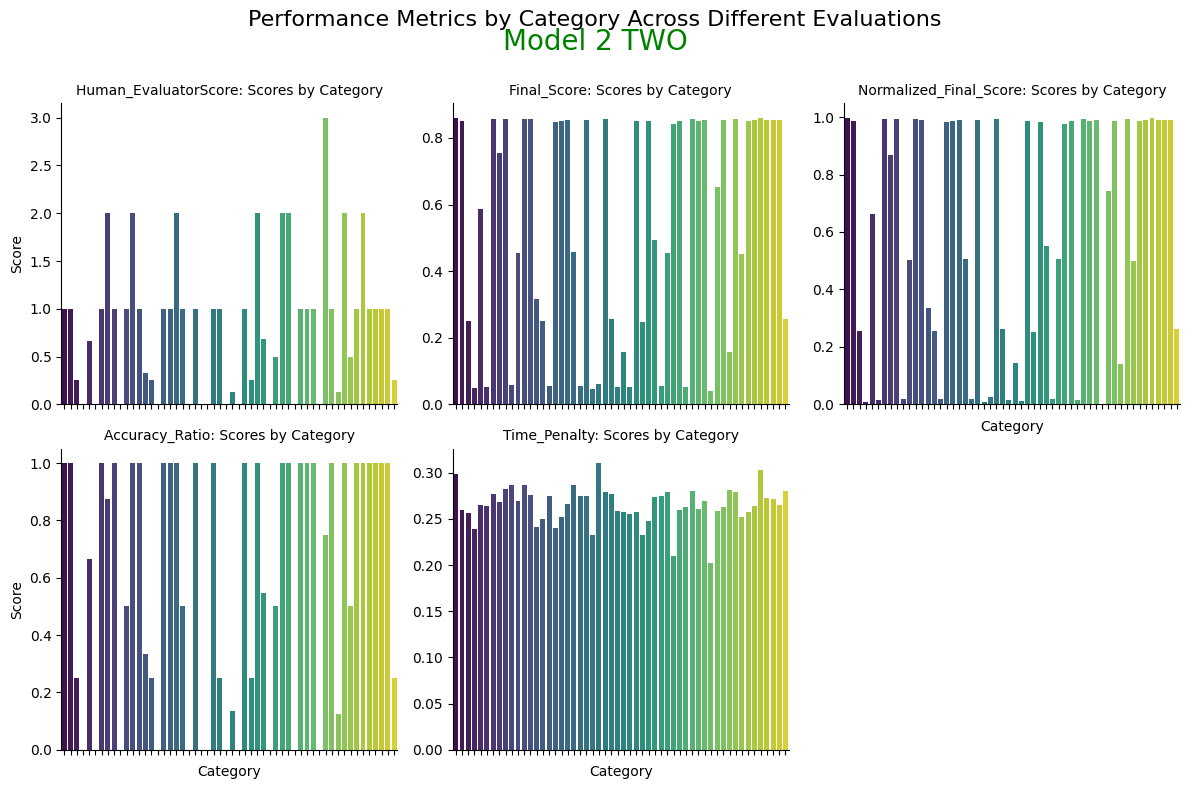

In [22]:
# Melt the DataFrame to "long" format
melted_df = summary_df.melt(id_vars='category', 
                             value_vars=['Human_EvaluatorScore', 'Final_Score', 
                                         'Normalized_Final_Score', 'Accuracy_Ratio', 
                                         'Time_Penalty'],
                             var_name='Metric', value_name='Score')

# Create a facet grid
g = sb.FacetGrid(melted_df, col='Metric', col_wrap=3, sharey=False, height=4)

# Map barplot onto the grid
g.map(sb.barplot, 'category', 'Score', palette='viridis')

# Rotate x-labels for better readability
g.set_xticklabels(rotation=45)

# Set descriptive titles for the facets
g.set_titles(col_template="{col_name}: Scores by Category")

# Set axis labels
g.set_axis_labels("Category", "Score")

# Set overall title for the figure
plt.subplots_adjust(top=0.85)  # This ensures we have space for the title above the plots
g.fig.suptitle("Performance Metrics by Category Across Different Evaluations", fontsize=16)

# Add the additional title "Model 3 Three" in green
# Use text() to place title; y=0.95 is just below the top of the figure
plt.figtext(0.5, 0.94, "Model 2 TWO", ha='center', va='center', fontsize=20, color='green')

# Show the plot with tight layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout fitting for overall title

# Save the plot to a file
plt.savefig("performance_metrics_by_category.png", bbox_inches='tight')
plt.show()

In [23]:
np.mean(summary_df["Normalized_Final_Score"])

0.6042343179566094